In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from bokeh.io import output_notebook
from bokeh.layouts import row, column
from bokeh.plotting import show, figure
from bokeh.models import ColumnDataSource, Slider, CustomJS

output_notebook()

Loading BokehJS ...

In [2]:
V_init = -65
n_init = 0.31
m_init = 0.05
h_init = 0.60

params=dict(g_Na=[120.0], g_K=[36.0], g_L=[0.3],
            E_Na=[50.0], E_K=[-77.0], E_L=[-50],
            C=[1])

In [3]:
def hh_step(I_ext, V, n, m, h, dt, params=params):
    dt = dt*1e3
    E_L = params['E_L'][0]
    E_Na = params['E_Na'][0]
    E_K = params['E_K'][0]
    g_L = params['g_L'][0]
    g_Na = params['g_Na'][0]
    g_K = params['g_K'][0]
    C = params['C'][0]

    dV = (I_ext - g_K*n**4*(V-E_K) - g_Na*m**3*h*(V-E_Na) -
          g_L*(V-E_L))/C

    dn = (0.01*(10-V)/(np.exp(1-V/10)-1))*(1-n) - 0.125*np.exp(-V/80)*n
    dm = ((2.5-0.1*V)/(np.exp(2.5-V/10)-1))*(1-m) - 4*np.exp(-V/18)*m
    dh = 0.07*np.exp(-V/20)*(1-h) - h/(1+np.exp(3-V/10))

    V1 = V + dV * dt
    n1 = n + dn * dt
    m1 = m + dm * dt
    h1 = h + dh * dt

    return [V1, n1, m1, h1]

In [4]:
dt = 1e-5
t = np.arange(0, 1, dt)

I_ext = np.zeros_like(t)
I_ext[int(len(t)*0.2):int(len(t)*0.8)] = 10

V = np.zeros_like(t)
n = np.zeros_like(t)
m = np.zeros_like(t)
h = np.zeros_like(t)

V[0] = V_init
n[0] = n_init
m[0] = m_init
h[0] = h_init

In [5]:
for i in tqdm(range(len(t))):
    V_pre, n_pre, m_pre, h_pre = hh_step(I_ext[i], V[i], n[i], m[i], h[i], dt)
    if i < len(t)-1:
        V[i+1] = V_pre
        n[i+1] = n_pre
        m[i+1] = m_pre
        h[i+1] = h_pre
        
source = ColumnDataSource(data=dict(I=I_ext, V=V, t=t, m=m, n=n, h=h))

  0%|          | 0/100000 [00:00<?, ?it/s]

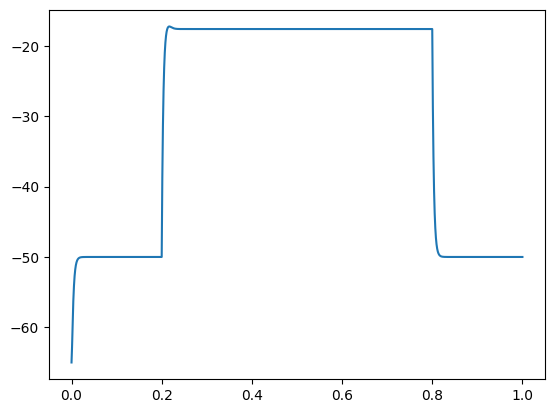

In [6]:
import matplotlib.pyplot as plt
plt.plot(t, V)